
\newpage

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import rand_score
from scipy.cluster import hierarchy

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

In [63]:
url = "https://raw.githubusercontent.com/PratheepaJ/datasets/master/banknote.csv"
df = pd.read_csv(url)
df.head()

,Status,Length,Left,Right,Bottom,Top,Diagonal
0,genuine,214.8,131.0,131.1,9.0,9.7,141.0
1,genuine,214.6,129.7,129.7,8.1,9.5,141.7
2,genuine,214.8,129.7,129.7,8.7,9.6,142.2
3,genuine,214.8,129.7,129.6,7.5,10.4,142.0
4,genuine,215.0,129.6,129.7,10.4,7.7,141.8


In [64]:
#1 Store the `Status` variable in a separate object.
status = df['Status']

In [65]:
#2 what are the variables?

df.columns.tolist()

['Status', 'Length', 'Left', 'Right', 'Bottom', 'Top', 'Diagonal']

In [66]:
#3 remove the `Status` variable.
df_modified = df.drop(columns=['Status'])

Mean values:
 Length      214.8960
Left        130.1215
Right       129.9565
Bottom        9.4175
Top          10.6505
Diagonal    140.4835
dtype: float64

Variance values:
 Length      0.141793
Left        0.130339
Right       0.163274
Bottom      2.086878
Top         0.644723
Diagonal    1.327716
dtype: float64


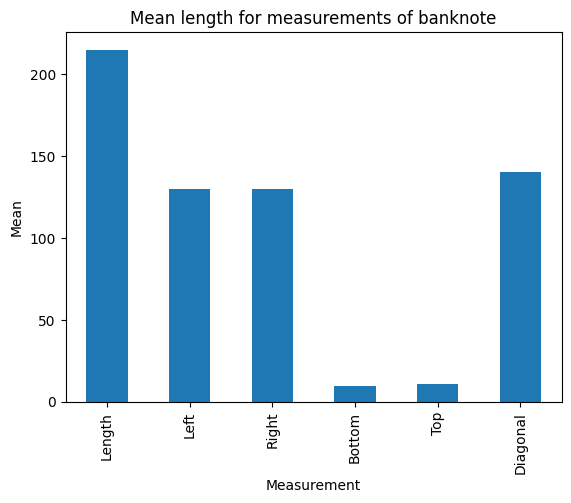

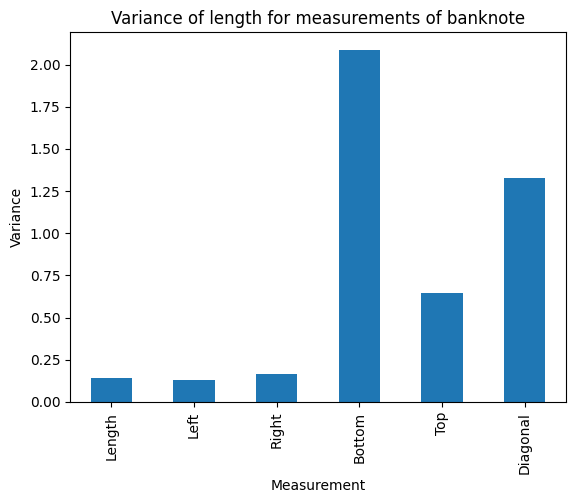

In [67]:
#4. Calculate the mean and variance for each variable in the dataset. 

mean_values = df_modified.mean()
variance_values = df_modified.var()

print("Mean values:\n", mean_values)
print("\nVariance values:\n", variance_values)

mean_values.plot(kind='bar')
plt.xlabel('Measurement')
plt.ylabel('Mean')
plt.title('Mean length for measurements of banknote')
plt.show()

variance_values.plot(kind='bar')
plt.xlabel('Measurement')
plt.ylabel('Variance')
plt.title('Variance of length for measurements of banknote')
plt.show()


From the variance plot, we can see that "Bottom" has the largest variance. High variance can dominate distance-based clustering algorithms(k-means), because they will contribute more to distance, which means the clusters will be mainly influenced by the "Bottom" variable. Feature scaling like normalization will be needed to make all the variable contribute equally.

In [68]:
#5 Normalize the dataset by centering and scaling all variables.
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_modified), columns=df_modified.columns)
df_normalized.head()

,Length,Left,Right,Bottom,Top,Diagonal
0,-0.255583,2.439452,2.837043,-0.289732,-1.186735,0.449372
1,-0.788048,-1.170437,-0.636381,-0.914304,-1.436443,1.058395
2,-0.255583,-1.170437,-0.636381,-0.497923,-1.311589,1.493412
3,-0.255583,-1.170437,-0.884483,-1.330685,-0.312759,1.319405
4,0.276882,-1.448121,-0.636381,0.681824,-3.683811,1.145399


In [69]:
#6 
df_numeric = df.drop(columns=['Status'])  
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_numeric)

k_values = range(2, 10) 
silhouette_scores = []  

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    cluster_labels = kmeans.fit_predict(df_normalized)
    silhouette_avg = silhouette_score(df_normalized, cluster_labels)
    
    silhouette_scores.append(silhouette_avg)
    print(f"Average silhouette score for k={k}: {silhouette_avg:.2f}")


Average silhouette score for k=2: 0.38
Average silhouette score for k=3: 0.33
Average silhouette score for k=4: 0.27
Average silhouette score for k=5: 0.22
Average silhouette score for k=6: 0.21
Average silhouette score for k=7: 0.22
Average silhouette score for k=8: 0.19
Average silhouette score for k=9: 0.20


For n_clusters = 2, the average silhouette score is 0.38


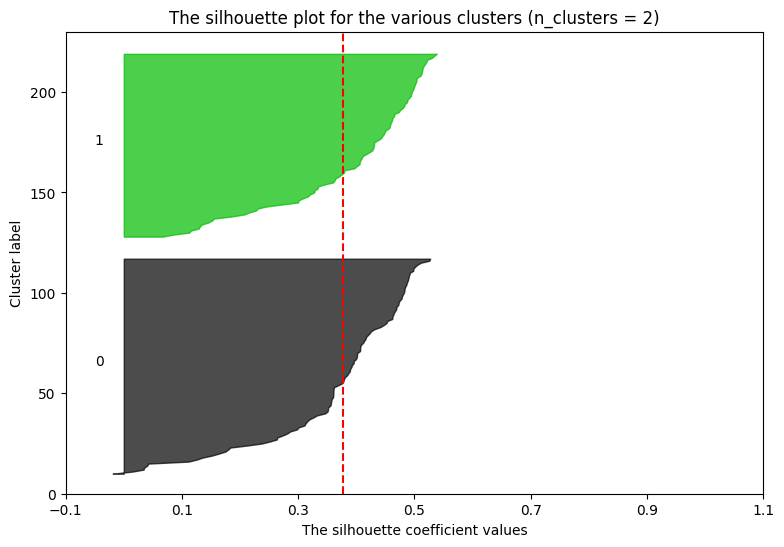

For n_clusters = 3, the average silhouette score is 0.33


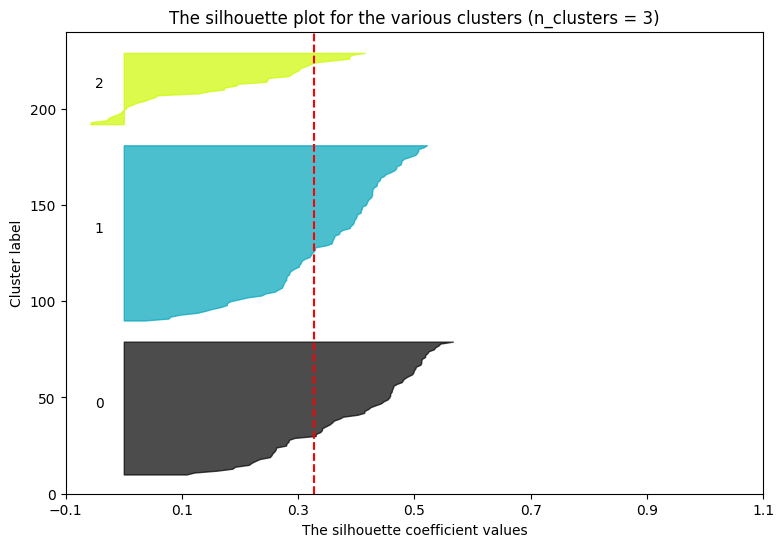

For n_clusters = 4, the average silhouette score is 0.27


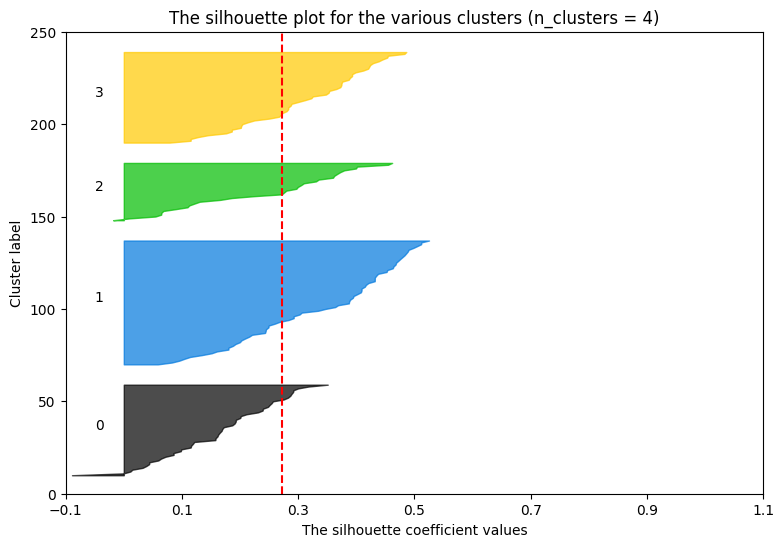

In [70]:
#7 Determine the optimal number of clusters, $k$, based on the silhouette score distribution.
range_n_clusters = [2, 3, 4]  # Testing k=2, 3, 4

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 6)

    ax1.set_xlim([-0.1, 1])  
    ax1.set_ylim([0, len(df_normalized) + (n_clusters + 1) * 10])  

    
    clusterer = KMeans(n_clusters=n_clusters, n_init=20, random_state=0)
    cluster_labels = clusterer.fit_predict(df_normalized)
    silhouette_avg = silhouette_score(df_normalized, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg:.2f}")

    
    sample_silhouette_values = silhouette_samples(df_normalized, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) 
        y_lower = y_upper + 10  

    ax1.set_title(f"The silhouette plot for the various clusters (n_clusters = {n_clusters})")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") 
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

    plt.show()

The silhouette score for K =2 is 0.38, which is the highest one. It indicate that data points in better defined cluster and more consistent. In the K=2 plot, it has minimum negative distribution, most of the points have positive silhouette values. K=2 is the best one.

In [71]:
#8 Apply k-means clustering to find clusters

optimal_k = 2
kmeans_optimal = KMeans(n_clusters=optimal_k, n_init=20, random_state=42)
cluster_labels_optimal = kmeans_optimal.fit_predict(df_normalized)

unique, counts = np.unique(cluster_labels_optimal, return_counts=True)
cluster_counts = dict(zip(unique, counts))

cluster_counts = {int(k): int(v) for k, v in cluster_counts.items()}
print(f"Number of observations within each cluster: {cluster_counts}")

Number of observations within each cluster: {0: 92, 1: 108}


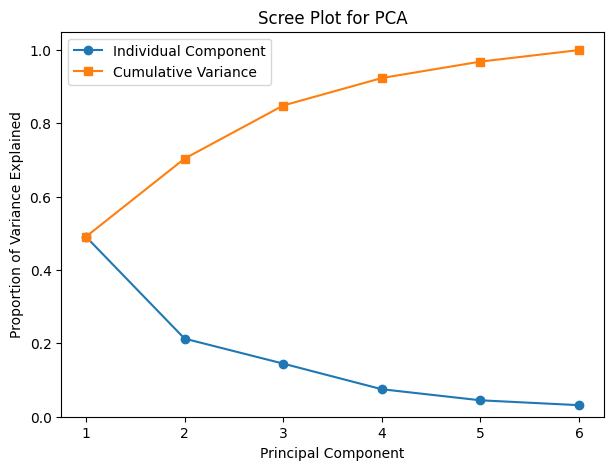

In [72]:
#9 

# Apply PCA
pca = PCA()
pca.fit(df_normalized)  # Ensure df_normalized is preprocessed

# Explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(7,5))
components = range(1, len(explained_variance_ratio) + 1)
plt.plot(components, explained_variance_ratio, 'o-', label='Individual Component')
plt.plot(components, cumulative_variance, 's-', label='Cumulative Variance')

plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(components)
plt.ylim(0, 1.05)
plt.legend(loc=2)
plt.title('Scree Plot for PCA')

# Show plot
plt.show()

For visualization with reduced dimensionalities, we can choose 2 principle components and the variance explained by the remaining PCs increases slowly(it retains about 70% of the variance, keeping most of the data's structure).

In [73]:
#10 identify which variable has the most significant influence

# pca loadings for pc2
loadings = pca.components_
second_pc_loadings = loadings[1] 

feature_names = df_modified.columns

loadings_df = pd.DataFrame(second_pc_loadings, index=feature_names, columns=['Second_PC_Loadings'])

# Sort absolute values to find the most influential variable
sorted_loadings = loadings_df['Second_PC_Loadings'].abs().sort_values(ascending=False)

print("Loadings for the second principal component:\n", loadings_df)
print("\nVariable with the most significant influence on the second principal component:\n", sorted_loadings.head(1))

Loadings for the second principal component:
           Second_PC_Loadings
Length              0.815495
Left                0.341967
Right               0.252459
Bottom             -0.266229
Top                -0.091487
Diagonal            0.273941

Variable with the most significant influence on the second principal component:
 Length    0.815495
Name: Second_PC_Loadings, dtype: float64


PCA loadings indicate the correlations between original variables and principle component. Because "length" has the highest absolute value. The variables with the most significant influence on PC2 is"length", with a loading of 0.8155. PC2 is mainly driven by variations in the lengths of the banknotes. 

In [74]:
# 11
pca = PCA()
pca.fit(df_normalized) 

cumulative_variance = pca.explained_variance_ratio_.cumsum()
variance_explained_by_first_two = cumulative_variance[1] 

# Print the result
print(f"Proportion of total variance explained by the first two principal components: {variance_explained_by_first_two:.6f}")

Proportion of total variance explained by the first two principal components: 0.703940


The proportion of variance explained by the first two principal components is 70%, these two components retain most of the dataset's variance.

/var/folders/sx/00v4vsfs2vs4gnsz544px2s80000gn/T/ipykernel_52886/1125369635.py:14: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='red', s=200, alpha=1.0, edgecolor='k')


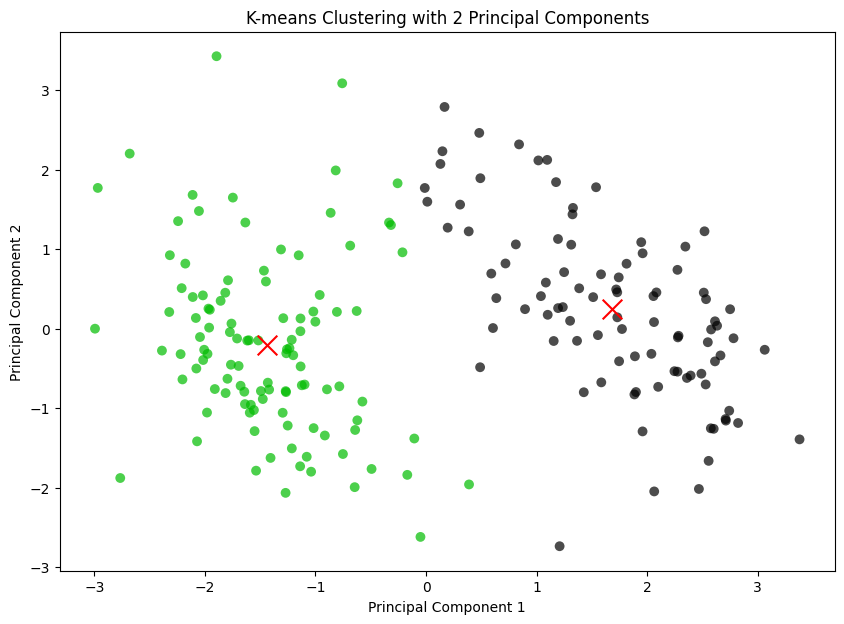

In [75]:
# 12 Create a visualization of the k-means cluster assignments

pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_normalized)

df_pca_2d = pd.DataFrame(df_pca_2d, columns=['PC1', 'PC2'])
df_pca_2d['Cluster'] = cluster_labels_optimal

plt.figure(figsize=(10, 7))
colors = cm.nipy_spectral(cluster_labels_optimal.astype(float) / optimal_k)
plt.scatter(df_pca_2d['PC1'], df_pca_2d['PC2'], marker='o', s=50, lw=0, alpha=0.7, c=colors, edgecolor='k')

centers = pca_2d.transform(kmeans_optimal.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', c='red', s=200, alpha=1.0, edgecolor='k')

plt.title('K-means Clustering with 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

13. Compare the true labels, represented by the `Status` variable saved in question (1), with the k-means cluster assignments determined in question (8). Use the adjusted Rand index to quantify the similarity between the true labels and the clustering assignments. Provide commentary on the implications of the results obtained from this comparison.

In [46]:

# Calculate the adjusted Rand index
ari = adjusted_rand_score(status, cluster_labels_optimal)
print(f"The adjusted Rand index is: {ari:.4f}")



The adjusted Rand index is: 0.8456


The ARI evaluate how well the cluster results match the ground true labels. ARI is 0.8456 which is very high and close to 1, which indicate that the K-means clustering closely aligns with the true labels. The K-means effectively identified the structures. 